# Week 37 handin

## Ex 1 Classes
1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()
7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url
7. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
   3. create a bar chart with student_name on x and avg_grade on y-axis
8. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
9. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)


## Ex 2 Exceptions
1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

## Ex 3 Plotting
1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)
2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)


## 02 Status

How far you got:


## 03 Exercise 1

1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create __init__() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()

In [1]:
class Student():

    def __init__(self, student_id, name, gender, data_sheet, image_url):
        self.student_id = student_id
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url
        
    def get_avg_grade(self):
        grade_list = self.data_sheet.get_grades_as_list()
        if len(grade_list) == 0:
            return 0
        avg_grade = 0
        for grade in grade_list:
            avg_grade += grade
        return round(avg_grade/len(grade_list))
    
    def show_progression(self):
        ETCS_needed = 150
        ETCS_completed = 0
        for course in self.data_sheet.courses:
            if self.student_id in course.optional_grades:
                if course.optional_grades[self.student_id] >= 2:
                    ETCS_completed += course.ETCS
        completed_per = ETCS_completed / ETCS_needed
        return round(completed_per*100, 2)
    
    def get_list_of_courses(self):
        return self.data_sheet.courses

    def __str__(self):
        return 'Student {s_id}: {name}, {gender}, {image_url}'.format(s_id=self.student_id, name=self.name, gender=self.gender, image_url=self.image_url)
        
class DataSheet():

    def __init__(self, student_id, courses=[]):
        self.student_id = student_id
        self.courses = courses

    def __str__(self):
        return 'DataSheet {data_sheet}'.format(data_sheet=self.courses)
    
    def __repr__(self):
        return self.__str__()

    def get_grades_as_list(self):
        result = []
        for course in self.courses:
            if self.student_id in course.optional_grades:
                result.append(course.optional_grades[self.student_id])
        return result

        
class Course():

    def __init__(self, name, classroom, teacher, ETCS, optional_grades):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ETCS = ETCS
        self.optional_grades = optional_grades

    def __str__(self):
        return 'Course {c_name}, {c_classroom}, {c_teacher}, {c_ETCS}, {c_optional_grades} '.format(c_name=self.name, c_classroom=self.classroom, c_teacher=self.teacher, c_ETCS=self.ETCS, c_optional_grades=self.optional_grades)
    
    def __repr__(self):
        return self.__str__()


7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url
   1. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [2]:
import ast
import random as r
import csv
import platform
from faker import Faker
fake = Faker()
if platform.system() == 'Windows':
    newline=''
else:
    newline=None
genders = ("Male","Female")
grades = (-3,0,2,4,7,10,12)

#print(fake.name())


def create_random_student(number_of_students):
    course_math = Course("Math", "101", fake.name(), 20, {})
    course_programming = Course("Programming", "102", fake.name(), 20, {})
    course_english = Course("English", "103", fake.name(), 25, {})
    course_physics = Course("Physics", "104", fake.name(), 30, {})
    course_history = Course("History", "105", fake.name(), 10, {})
    courses = [course_math, course_programming, course_english, course_physics, course_history]
    
    student_list = []
    for student_id in range(1,number_of_students+1):
        name = fake.name()
        image_url = name.replace(" ", "") + ".img"
        gender = genders[r.randint(1,len(genders))-1]
        student_courses = []
        for course in courses:
            if r.randint(1,2) == 1:
                student_courses.append(course)
                if r.randint(1,2) == 1:
                    course.optional_grades[student_id] = grades[r.randint(1,len(grades))-1]
        data_sheet = DataSheet(student_id, student_courses)
        new_student = Student(student_id, name, gender, data_sheet, image_url)
        student_list.append(new_student)
    
    # export data to a .csv file
    with open("randomStudents.csv", 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)

        for student in student_list:
            student_courses = []
            student_optional_grades = []
            for course in student.data_sheet.courses:
                student_courses.append([course.name, course.classroom, course.teacher, course.ETCS])
                if student.student_id in course.optional_grades:
                    student_optional_grades.append(course.optional_grades[student.student_id])
                else:
                    student_optional_grades.append("No Grade")
            output_writer.writerow([student.student_id, student.name, student.gender, student_courses, student_optional_grades, student.image_url])

create_random_student(10)

8. Read student data into a list of Students from a csv file: 
   1. loop through the list and print each student with name, img_url and avg_grade.
   2. sort the list by avg_grade
  

In [3]:
student_list = []
course_list = []
with open("randomStudents.csv") as file_object:
    reader = csv.reader(file_object)
    
    print("Normal List:")
    for row in reader:
        student_id = row[0]
        student_name = row[1]
        student_gender = row[2]
        student_courses_info = ast.literal_eval(row[3])
        student_optional_grades = ast.literal_eval(row[4])
        student_image_url = row[5]
        student_courses = []
        #print(id)
        
        for next_course in student_courses_info:
            course_index = student_courses_info.index(next_course)
            new_course = None
            for course in course_list:
                if next_course[0] == course.name:
                    new_course = course
                    break
            if new_course == None:
                new_course = Course(next_course[0], next_course[1], next_course[2], next_course[3], {})
                course_list.append(new_course)
            student_courses.append(new_course)
            if not isinstance(student_optional_grades[course_index], str):
                new_course.optional_grades[student_id] = student_optional_grades[course_index]
                
        student_data_sheet = DataSheet(student_id, student_courses)
        new_student = Student(student_id, student_name, student_gender, student_data_sheet, student_image_url)
        student_list.append(new_student)

        print("Student:",new_student.name,"Image URL:",student_image_url,"Average Grade:",new_student.get_avg_grade())
        

print("\nSorted by avg grade")

def student_sort(student):
    return student.get_avg_grade()

student_list.sort(reverse=True, key=student_sort)
    
for student in student_list:
    print("Student:",student.name,"Image URL:",student_image_url,"Average Grade:",student.get_avg_grade())

Normal List:
Student: Derek Allen Image URL: DerekAllen.img Average Grade: 4
Student: Paul Wilkins Image URL: PaulWilkins.img Average Grade: 4
Student: Jeremy Bowers Image URL: JeremyBowers.img Average Grade: 0
Student: Stanley Hooper Image URL: StanleyHooper.img Average Grade: 2
Student: Elizabeth Dunn Image URL: ElizabethDunn.img Average Grade: 0
Student: Theresa Anderson Image URL: TheresaAnderson.img Average Grade: 12
Student: Laurie Kelly Image URL: LaurieKelly.img Average Grade: 6
Student: Nancy Hall Image URL: NancyHall.img Average Grade: -1
Student: Taylor Roberts Image URL: TaylorRoberts.img Average Grade: 0
Student: Stephanie Romero Image URL: StephanieRomero.img Average Grade: 4

Sorted by avg grade
Student: Theresa Anderson Image URL: StephanieRomero.img Average Grade: 12
Student: Laurie Kelly Image URL: StephanieRomero.img Average Grade: 6
Student: Derek Allen Image URL: StephanieRomero.img Average Grade: 4
Student: Paul Wilkins Image URL: StephanieRomero.img Average Grade

    C. create a bar chart with student_name on x and avg_grade on y-axis

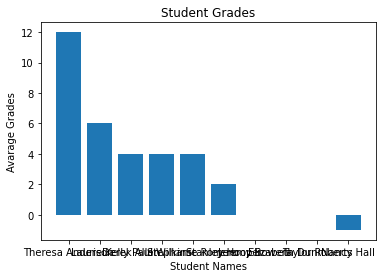

In [4]:
import matplotlib.pyplot as plt

names = []
grades = [] 
for student in student_list:
    names.append(student.name)
    grades.append(student_sort(student))    

    
plt.bar(names, grades)
plt.xlabel("Student Names")
plt.ylabel("Avarage Grades")
plt.title("Student Grades")

plt.show()

9. Make a method on Student class that can show progression of the study in % (add up ECTS from all passed courses divided by total of 150 total points (equivalent to 5 semesters))
10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

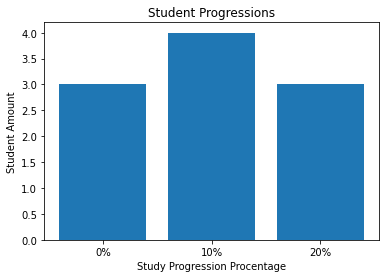

In [5]:
def progress_sort(student):
    return student.show_progression()

student_list.sort(key=progress_sort)

progression = {}
category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
for student in student_list:
    s_progress = student.show_progression()
    for category in category_steps:
        if s_progress >= category:
            c_progress = str(category) + "%"
            if not c_progress in progression:
                progression[c_progress] = 1
            else:
                progression[c_progress] = progression[c_progress] + 1
            break
                   
progress = list(progression.keys())
amount_of_students = list(progression.values())

plt.bar(progress, amount_of_students)
plt.xlabel("Study Progression Procentage")
plt.ylabel("Student Amount")
plt.title("Student Progressions")

plt.show()

## 04 Exercise 2

1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)
3. Create another function that can create a csv file with 3 students closest to completion
   1. If an exception is raised write an appropriate message to the file

In [16]:
class NotEnoughStudentsException(Exception):
    pass

def progress_sort(student):
    return student.show_progression()

def three_closest_students(s_list):
    try:
        if len(s_list) < 3:
            raise NotEnoughStudentsException()
        s_list.sort(reverse=True, key=progress_sort)
        return list([s_list[0], s_list[1], s_list[2]])
        #return s_list
    except NotEnoughStudentsException:
        print('ERROR: Not enough students in list!')
        
    
#1
print("3 closes on ETCS points")
three_closest = (three_closest_students(student_list))
for student in three_closest:
    student_courses = []
    student_optional_grades = []
    for course in student.data_sheet.courses:
        student_courses.append([course.name, course.classroom, course.teacher, course.ETCS])
        if student.student_id in course.optional_grades:
            student_optional_grades.append(course.optional_grades[student.student_id])
        else:
            student_optional_grades.append("No Grade")
    print([student.student_id, student.name, student.gender, student_courses, student_optional_grades, student.image_url],"\n")

#2
print("\nExpecting error as list is empty")
three_closest = three_closest_students([])

#3
def three_closest_students_too_file(s_list):
    
    with open("TopThreeStudents.csv", 'w', newline=newline) as output_file:
        output_writer = csv.writer(output_file)
        try:
            if len(s_list) < 3:
                raise NotEnoughStudentsException()
            three_closest = three_closest_students(s_list)
            for student in three_closest:
                student_courses = []
                student_optional_grades = []
                for course in student.data_sheet.courses:
                    student_courses.append([course.name, course.classroom, course.teacher, course.ETCS])
                    if student.student_id in course.optional_grades:
                        student_optional_grades.append(course.optional_grades[student.student_id])
                    else:
                        student_optional_grades.append("No Grade")
                output_writer.writerow([student.student_id, student.name, student.gender, student_courses, student_optional_grades, student.image_url])
                    
        except NotEnoughStudentsException:
            output_writer.writerow(['ERROR: Not enough students in list!'])
            
print("\n3 highest ECTS score student saved to TopThreeStudents.csv")
three_closest_students_too_file(student_list)

3 closes on ETCS points
['7', 'Laurie Kelly', 'Female', [['Physics', '104', 'Gregory Collier', 30], ['History', '105', 'Angie Warren', 10]], [4, 7], 'LaurieKelly.img'] 

['6', 'Theresa Anderson', 'Female', [['Physics', '104', 'Gregory Collier', 30]], [12], 'TheresaAnderson.img'] 

['10', 'Stephanie Romero', 'Female', [['Physics', '104', 'Gregory Collier', 30]], [4], 'StephanieRomero.img'] 


Expecting error as list is empty
ERROR: Not enough students in list!

3 highest ECTS score student saved to TopThreeStudents.csv


## 05 Exercise 3

1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)

['20% completed ETCS', '10% completed ETCS', '0% completed ETCS']
[3, 4, 3]


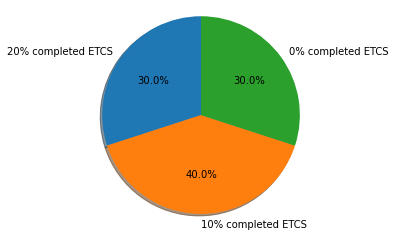

In [7]:
def pie_chart_from_ECTS(s_list):
    progression = {}
    category_steps = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    for student in s_list:
        s_progress = student.show_progression()
        for category in category_steps:
            if s_progress >= category:
                c_progress = str(category) + "% completed ETCS"
                if not c_progress in progression:
                    progression[c_progress] = 1
                else:
                    progression[c_progress] = progression[c_progress] + 1
                break
    
    x_values = list(progression.keys())
    y_values = list(progression.values())
    
    print(x_values)
    print(y_values)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(y_values, labels=x_values, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()
            
pie_chart_from_ECTS(student_list)

2. create a function that can take a list of students and show how many students have taken each course (bar chart)
   1. create a method on student that can return a list of courses
3. make the figure show males and females in different colors for each course (display 2 datasets in same figure)

Males: {'Physics': 1, 'History': 0, 'Programming': 2, 'English': 3, 'Math': 4}
Females: {'Physics': 4, 'History': 3, 'Programming': 2, 'English': 3, 'Math': 1}


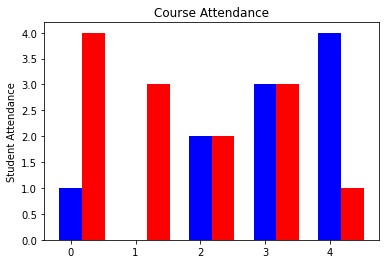

In [8]:
import numpy as np

def bar_chart_from_courses_taken(s_list):
    men_c_list = {}
    woman_c_list = {}
    for s in s_list:
        s_courses = s.get_list_of_courses()
        if s.gender == "Male":
            for c in s_courses:
                if not c.name in men_c_list:
                    men_c_list[c.name] = 1
                    woman_c_list[c.name] = 0
                else:
                    men_c_list[c.name] = men_c_list[c.name] + 1
        else:
            for c in s_courses:
                if not c.name in woman_c_list:
                    woman_c_list[c.name] = 1
                    men_c_list[c.name] = 0
                else:
                    woman_c_list[c.name] = woman_c_list[c.name] + 1
    print("Males: " + str(men_c_list))
    print("Females: " + str(woman_c_list))
    
    men_x_values = list(men_c_list.keys())
    men_y_values = list(men_c_list.values())
    woman_x_values = list(woman_c_list.keys())
    woman_y_values = list(woman_c_list.values())
    
    num_courses = len(men_x_values)
    
    ind = np.arange(num_courses)
    width = 0.35  
    
    plt.bar(ind, men_y_values, width, color='blue', label='Men')
    plt.bar(ind + width, woman_y_values, width, color='red', label='Women')
    plt.ylabel("Student Attendance")
    plt.title("Course Attendance")

    plt.show()

bar_chart_from_courses_taken(student_list)